In [53]:
import pandas as pd
import numpy as np

In [54]:
Data=pd.read_csv('Randomforest.csv')
Data.head()

,s.no,Age,Salary,Field of Work
0,0,28,75000,Software
1,1,22,50000,Software
2,2,25,45000,Software
3,3,28,60000,Hardware
4,4,18,20000,Software


In [55]:
from sklearn.preprocessing import LabelEncoder
FOW=LabelEncoder()

In [56]:
df=pd.DataFrame(Data)
df.head()

,s.no,Age,Salary,Field of Work
0,0,28,75000,Software
1,1,22,50000,Software
2,2,25,45000,Software
3,3,28,60000,Hardware
4,4,18,20000,Software


In [69]:
df['FoW']=FOW.fit_transform(df['Field of Work'])
df.drop(['Field of Work'],axis=1,inplace=True)
x=df.iloc[:,1:3]
y=df.iloc[:,3]
print(x,y)

    Age  Salary
0    28   75000
1    22   50000
2    25   45000
3    28   60000
4    18   20000
5    24   55000
6    26   45000
7    28   80000
8    25   50000
9    19   20000
10   32   75000
11   33   75000
12   27   60000
13   36  100000 0     1
1     1
2     1
3     0
4     1
5     1
6     0
7     0
8     1
9     1
10    1
11    0
12    1
13    1
Name: FoW, dtype: int64


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [71]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

In [72]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
model.score(X_test,y_test)

0.6666666666666666

In [74]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1])

In [79]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[0, 1],
       [0, 2]])

Text(33.0, 0.5, 'actual')

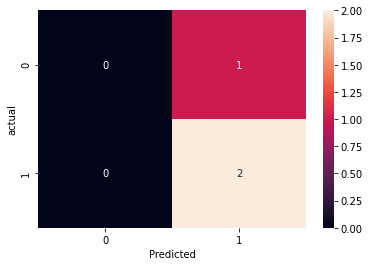

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('actual')

In [81]:
pred=model.predict([[28,55000]])
pred

array([0])

In [82]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
